In [1]:
!nvidia-smi

Fri Jan 10 19:38:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Au début du code, après les imports, ajoutez :
import tensorflow as tf

# Vérifier si le GPU est disponible
print("GPU disponible:", tf.test.is_built_with_cuda())
print("Périphériques disponibles:", tf.config.list_physical_devices())

# Configuration pour utiliser le GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU configuré avec succès")
    except RuntimeError as e:
        print(e)

GPU disponible: True
Périphériques disponibles: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU configuré avec succès


In [3]:
import os

def afficher_dossiers(chemin, niveau=0):
    """
    Affiche uniquement la structure des dossiers à partir du chemin spécifié.
    
    Args:
        chemin (str): Le chemin du dossier à explorer
        niveau (int): Le niveau d'indentation actuel
    """
    try:
        elements = os.listdir(chemin)
    except:
        print("⚠️ Erreur d'accès au dossier:", chemin)
        return

    # Filtrer pour ne garder que les dossiers et les trier
    dossiers = sorted([elem for elem in elements 
                      if os.path.isdir(os.path.join(chemin, elem))])

    for dossier in dossiers:
        chemin_complet = os.path.join(chemin, dossier)
        indentation = "│   " * niveau
        print(f"{indentation}📁 {dossier}/")
        # Appel récursif pour le sous-dossier
        afficher_dossiers(chemin_complet, niveau + 1)

# Utilisation avec votre chemin de base
base_path = '/kaggle/input/cityscape-data/data'
print(f"Structure des dossiers : {base_path}")
print("=" * 50)
afficher_dossiers(base_path)

Structure des dossiers : /kaggle/input/cityscape-data/data
📁 test/
│   📁 images/
│   📁 masks/
📁 train/
│   📁 images/
│   📁 masks/
📁 val/
│   📁 images/
│   📁 masks/


In [4]:
import glob
# Configuration des chemins
base_path = '/kaggle/input/cityscape-data/data'
images_path = os.path.join(base_path)
masks_path = os.path.join(base_path)

# Lecture des datasets
# Training
train_img = glob.glob(os.path.join(images_path, 'train', 'images', '*.png'))
train_label = []
for img_path in train_img:
    img_name = os.path.basename(img_path)
    label_path = os.path.join(masks_path, 'train', 'masks', img_name)
    train_label.append(label_path)

# Validation
val_img = glob.glob(os.path.join(images_path, 'val', 'images', '*.png'))
val_label = []
for img_path in val_img:
    img_name = os.path.basename(img_path)
    label_path = os.path.join(masks_path, 'val', 'masks', img_name)
    val_label.append(label_path)

# Test
test_img = glob.glob(os.path.join(images_path, 'test', 'images', '*.png'))
test_label = []
for img_path in test_img:
    img_name = os.path.basename(img_path)
    label_path = os.path.join(masks_path, 'test', 'masks', img_name)
    test_label.append(label_path)

print(f"Nombre d'images d'entraînement : {len(train_img)}")
print(f"Nombre d'images de validation : {len(val_img)}")
print(f"Nombre d'images de test : {len(test_img)}")

Nombre d'images d'entraînement : 2975
Nombre d'images de validation : 500
Nombre d'images de test : 1525


In [5]:
import os
import glob
import numpy as np
import shutil
from sklearn.model_selection import train_test_split

# Configuration des chemins
input_path = '/kaggle/input/cityscape-data/data'
working_path = '/kaggle/working/data'  # Nouveau dossier de travail

# Créer la structure des dossiers dans working
for folder in ['train', 'val']:
    for subfolder in ['images', 'masks']:
        os.makedirs(os.path.join(working_path, folder, subfolder), exist_ok=True)

# Copier d'abord tous les fichiers de train et val
for folder in ['train', 'val']:
    for subfolder in ['images', 'masks']:
        src_files = glob.glob(os.path.join(input_path, folder, subfolder, '*.png'))
        for file in src_files:
            filename = os.path.basename(file)
            dest = os.path.join(working_path, folder, subfolder, filename)
            shutil.copy2(file, dest)

# Maintenant traiter les fichiers de test
test_images = glob.glob(os.path.join(input_path, 'test', 'images', '*.png'))
test_masks = glob.glob(os.path.join(input_path, 'test', 'masks', '*.png'))

# Split des données test
test_train_img, test_val_img, test_train_mask, test_val_mask = train_test_split(
    test_images, test_masks, test_size=0.2, random_state=42
)

# Fonction pour copier les fichiers
def copy_files(files, destination_folder):
    for file in files:
        filename = os.path.basename(file)
        destination = os.path.join(working_path, destination_folder, 'images' if 'images' in file else 'masks', filename)
        shutil.copy2(file, destination)
        print(f"Copié: {filename} vers {destination_folder}")

# Copier les fichiers
copy_files(test_train_img, 'train')
copy_files(test_train_mask, 'train')

copy_files(test_val_img, 'val')
copy_files(test_val_mask, 'val')

# Vérifier les nombres de fichiers après transfert
train_images = len(glob.glob(os.path.join(working_path, 'train', 'images', '*.png')))
train_masks = len(glob.glob(os.path.join(working_path, 'train', 'masks', '*.png')))
val_images = len(glob.glob(os.path.join(working_path, 'val', 'images', '*.png')))
val_masks = len(glob.glob(os.path.join(working_path, 'val', 'masks', '*.png')))

print(f"\nNombre final d'images dans train: {train_images}")
print(f"Nombre final de masques dans train: {train_masks}")
print(f"Nombre final d'images dans val: {val_images}")
print(f"Nombre final de masques dans val: {val_masks}")

# Mettre à jour les chemins pour la suite de votre code
base_path = working_path  # Utiliser le nouveau chemin pour la suite

Copié: image4912.png vers train
Copié: image4008.png vers train
Copié: image4337.png vers train
Copié: image4280.png vers train
Copié: image4164.png vers train
Copié: image4764.png vers train
Copié: image4441.png vers train
Copié: image4754.png vers train
Copié: image4649.png vers train
Copié: image4295.png vers train
Copié: image3606.png vers train
Copié: image4022.png vers train
Copié: image3633.png vers train
Copié: image4652.png vers train
Copié: image4400.png vers train
Copié: image4434.png vers train
Copié: image4339.png vers train
Copié: image3930.png vers train
Copié: image4147.png vers train
Copié: image4903.png vers train
Copié: image4755.png vers train
Copié: image4388.png vers train
Copié: image3501.png vers train
Copié: image4991.png vers train
Copié: image4733.png vers train
Copié: image3560.png vers train
Copié: image4890.png vers train
Copié: image3662.png vers train
Copié: image3760.png vers train
Copié: image4112.png vers train
Copié: image4382.png vers train
Copié: i

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Créer les datasets à partir des chemins d'images
train_ds = tf.data.Dataset.from_tensor_slices((train_img, train_label))
val_ds = tf.data.Dataset.from_tensor_slices((val_img, val_label))

In [7]:
# Fonctions de lecture d'images
def read_png(img):
    img = tf.io.read_file(img)
    img = tf.image.decode_png(img, channels=3)
    return img
    
def read_png_label(img):
    img = tf.io.read_file(img)
    img = tf.image.decode_png(img, channels=1)  
    return img

In [8]:
# Data Augmentation
def rand_crop(img, label):
    concat_img = tf.concat([img, label], axis=-1)
    concat_img = tf.image.resize(concat_img, [280, 560], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    crop_img = tf.image.random_crop(concat_img, [256, 256, 4])
    return crop_img[:, :, :3], crop_img[:, :, 3:]

def norm(img, label):
    img = tf.cast(img, tf.float32)/127.5-1
    label = tf.cast(label, tf.int32)
    return img, label

def load_img_train(img, label):
    img = read_png(img)
    label = read_png_label(label)
    
    img, label = rand_crop(img, label)
    
    if tf.random.uniform(()) > 0.5:
        img = tf.image.flip_left_right(img)
        label = tf.image.flip_left_right(label)
    return norm(img, label)

def load_img_val(img, label):
    img = read_png(img)
    label = read_png_label(label)
    
    img = tf.image.resize(img, [256, 256])
    label = tf.image.resize(label, [256, 256])
    return norm(img, label)

In [9]:
# Configuration des paramètres
BATCH_SIZE = 32
BUFFER_SIZE = 300
steps_per_epoch = 4195 // BATCH_SIZE  # Adapté à votre nombre d'images de train
validation_steps = 805 // BATCH_SIZE   # Adapté à votre nombre d'images de validation
auto = tf.data.experimental.AUTOTUNE

# Préparation des datasets
train_ds = train_ds.map(load_img_train, num_parallel_calls=auto)
train_ds = train_ds.cache().repeat().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(auto)

val_ds = val_ds.map(load_img_val, num_parallel_calls=auto)
val_ds = val_ds.cache().batch(BATCH_SIZE)

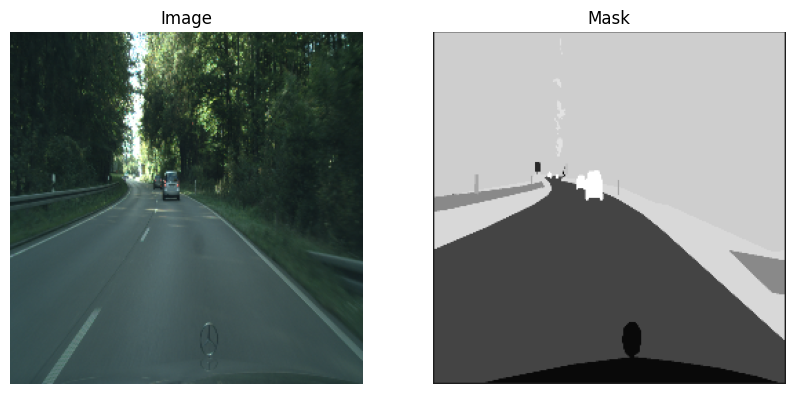

In [10]:
# Visualisation d'un exemple
for img, label in val_ds.take(1):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow((img[0] + 1)/2)
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(np.squeeze(label[0]), cmap='gray')
    plt.title('Mask')
    plt.axis('off')
    plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# Définition de la métrique IoU personnalisée
class MeanIoU(tf.keras.metrics.MeanIoU):
    def __call__(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.argmax(y_pred, axis=-1)
        return super().__call__(y_true, y_pred, sample_weight=sample_weight)

def create_model():
    inputs = tf.keras.layers.Input(shape=(256, 256, 3))
    # Encoder Path (Contraction)
    print("Encoder dimensions:")
    # Block 1
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    skip1 = x
    print("Skip1 shape:", skip1.shape)
    x = tf.keras.layers.MaxPooling2D(padding='same')(x)
    # Block 2
    x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    skip2 = x
    print("Skip2 shape:", skip2.shape)
    x = tf.keras.layers.MaxPooling2D(padding='same')(x)
    # Block 3
    x = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    skip3 = x
    print("Skip3 shape:", skip3.shape)
    x = tf.keras.layers.MaxPooling2D(padding='same')(x)
    # Block 4
    x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    skip4 = x
    print("Skip4 shape:", skip4.shape)
    x = tf.keras.layers.MaxPooling2D(padding='same')(x)
    
    print("\nBottleneck dimensions:")
    # Bridge
    x = tf.keras.layers.Conv2D(1024, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(1024, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    print("Bridge shape:", x.shape)
    
    print("\nDecoder dimensions:")
    # Decoder Path (Expansion)
    # Block 5
    x = tf.keras.layers.Conv2DTranspose(512, 2, strides=2, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    print("Before concat4 shape:", x.shape)
    print("Skip4 shape:", skip4.shape)
    x = tf.keras.layers.Concatenate()([skip4, x])
    x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    # Block 6
    x = tf.keras.layers.Conv2DTranspose(256, 2, strides=2, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    print("Before concat3 shape:", x.shape)
    print("Skip3 shape:", skip3.shape)
    x = tf.keras.layers.Concatenate()([skip3, x])
    x = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    # Block 7
    x = tf.keras.layers.Conv2DTranspose(128, 2, strides=2, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    print("Before concat2 shape:", x.shape)
    print("Skip2 shape:", skip2.shape)
    x = tf.keras.layers.Concatenate()([skip2, x])
    x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    # Block 8
    x = tf.keras.layers.Conv2DTranspose(64, 2, strides=2, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    print("Before concat1 shape:", x.shape)
    print("Skip1 shape:", skip1.shape)
    x = tf.keras.layers.Concatenate()([skip1, x])
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    # Output Layer
    outputs = tf.keras.layers.Conv2D(34, 1, activation='softmax')(x)
    print("\nOutput shape:", outputs.shape)
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Créer le modèle et voir les dimensions
model = create_model()

# Compilation et rappel des callbacks
model_path = 'myunet1.keras'
callbacks = [
    ModelCheckpoint(
        model_path, 
        monitor="val_loss", 
        verbose=1,
        save_best_only=True,
        mode='min'
    )
]

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc', MeanIoU(num_classes=34)]
)

print("\nRésumé du modèle:")
model.summary()

Encoder dimensions:
Skip1 shape: (None, 256, 256, 64)
Skip2 shape: (None, 128, 128, 128)
Skip3 shape: (None, 64, 64, 256)
Skip4 shape: (None, 32, 32, 512)

Bottleneck dimensions:
Bridge shape: (None, 16, 16, 1024)

Decoder dimensions:
Before concat4 shape: (None, 32, 32, 512)
Skip4 shape: (None, 32, 32, 512)
Before concat3 shape: (None, 64, 64, 256)
Skip3 shape: (None, 64, 64, 256)
Before concat2 shape: (None, 128, 128, 128)
Skip2 shape: (None, 128, 128, 128)
Before concat1 shape: (None, 256, 256, 64)
Skip1 shape: (None, 256, 256, 64)

Output shape: (None, 256, 256, 34)

Résumé du modèle:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256, 256, 64)   │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128, 128, 128)  │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 128, 128, 128)  │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ batch_normalization_3… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 64, 64, 256)    │          1,024 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 64, 64, 256)    │          1,024 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2      

 Total params: 31,061,282 (118.49 MB)

 Trainable params: 31,047,586 (118.44 MB)

 Non-trainable params: 13,696 (53.50 KB)

In [12]:
class CustomMeanIoU(tf.keras.metrics.MeanIoU):
    def __init__(self, num_classes, name=None, dtype=None):
        super().__init__(num_classes=num_classes, name=name, dtype=dtype)
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.squeeze(y_true, axis=-1)
        y_pred = tf.argmax(y_pred, axis=-1)
        y_true = tf.cast(y_true, tf.int32)
        y_pred = tf.cast(y_pred, tf.int32)
        return super().update_state(y_true, y_pred, sample_weight)

class MulticlassF1Score(tf.keras.metrics.F1Score):
    def __init__(self, average='macro', name=None, dtype=None):
        super().__init__(average=average, name=name, dtype=dtype)
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        # Aplatir les dimensions spatiales
        y_true = tf.reshape(tf.squeeze(y_true, axis=-1), [-1])
        y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=34)
        
        # Reshape y_pred pour correspondre au format attendu
        y_pred = tf.reshape(y_pred, [-1, 34])
        
        return super().update_state(y_true, y_pred, sample_weight)

class MulticlassRecall(tf.keras.metrics.Recall):
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.reshape(tf.squeeze(y_true, axis=-1), [-1])
        y_pred = tf.reshape(tf.argmax(y_pred, axis=-1), [-1])
        return super().update_state(y_true, y_pred, sample_weight)

class MulticlassPrecision(tf.keras.metrics.Precision):
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.reshape(tf.squeeze(y_true, axis=-1), [-1])
        y_pred = tf.reshape(tf.argmax(y_pred, axis=-1), [-1])
        return super().update_state(y_true, y_pred, sample_weight)

In [13]:
# Compilation du modèle
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=[
        'accuracy',
        CustomMeanIoU(num_classes=34),
        MulticlassRecall(name='recall'),
        MulticlassPrecision(name='precision'),
        MulticlassF1Score(name='f1_score')
    ]
)

# Configuration des callbacks sans EarlyStopping
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'myunet1.keras',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6
    ),
    tf.keras.callbacks.CSVLogger('training_log.csv')
]

# Entraînement
history = model.fit(
    train_ds,
    validation_data=val_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6428 - custom_mean_io_u: 0.0778 - f1_score: 0.1145 - loss: 1.5407 - precision: 0.9999 - recall: 0.9988
Epoch 1: val_loss improved from inf to 6.79588, saving model to myunet1.keras


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


131/131 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.6434 - custom_mean_io_u: 0.0779 - f1_score: 0.1147 - loss: 1.5375 - precision: 0.9999 - recall: 0.9988 - val_accuracy: 0.3376 - val_custom_mean_io_u: 0.0143 - val_f1_score: 0.0226 - val_loss: 6.7959 - val_precision: 0.9997 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 753ms/step - accuracy: 0.7836 - custom_mean_io_u: 0.1306 - f1_score: 0.1730 - loss: 0.7923 - precision: 0.9999 - recall: 1.0000
Epoch 2: val_loss improved from 6.79588 to 3.90306, saving model to myunet1.keras
131/131 ━━━━━━━━━━━━━━━━━━━━ 105s 799ms/step - accuracy: 0.7837 - custom_mean_io_u: 0.1305 - f1_score: 0.1730 - loss: 0.7920 - precision: 0.9999 - recall: 1.0000 - val_accuracy: 0.4413 - val_custom_mean_io_u: 0.0289 - val_f1_score: 0.0428 - val_loss: 3.9031 - val_precision: 0.9997 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.8171 - custom_mean_io_u: 0.1

<ipython-input-14-a3e930b467bc>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


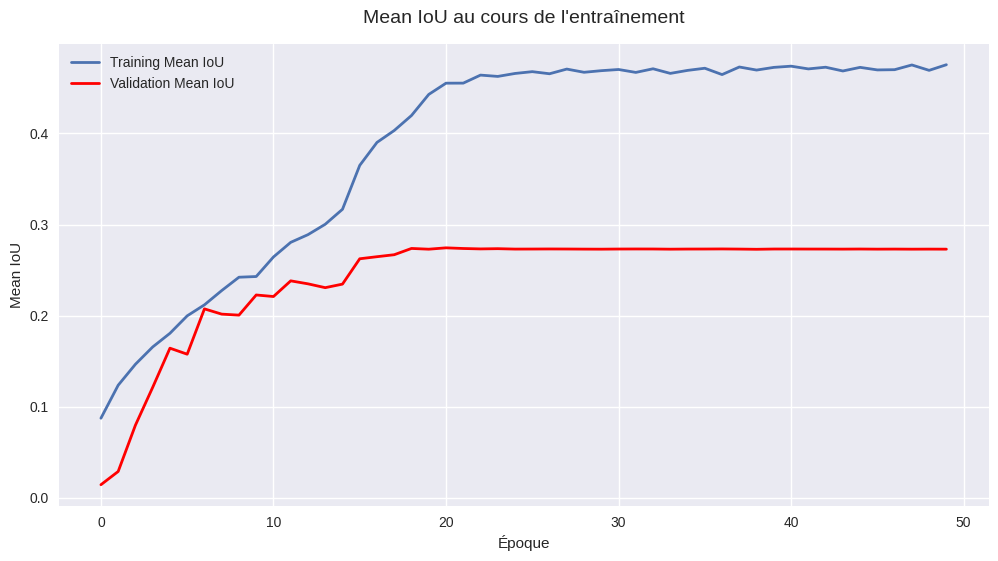

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style to white for a plain background
sns.set_style("white")
plt.style.use("seaborn")

# Read the CSV file
history_df = pd.read_csv('training_log.csv')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Training Mean IoU
ax.plot(history_df['epoch'], history_df['custom_mean_io_u'], label='Training Mean IoU', linewidth=2)

# Plot Validation Mean IoU in red
ax.plot(history_df['epoch'], history_df['val_custom_mean_io_u'], label='Validation Mean IoU', linewidth=2, color='red')

# Set titles and labels
ax.set_title('Mean IoU au cours de l\'entraînement', fontsize=14, pad=15)
ax.set_xlabel('Époque')
ax.set_ylabel('Mean IoU')

# Add legend
ax.legend(loc='best')

# Display the plot
plt.show()

<ipython-input-15-20124c7ad702>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


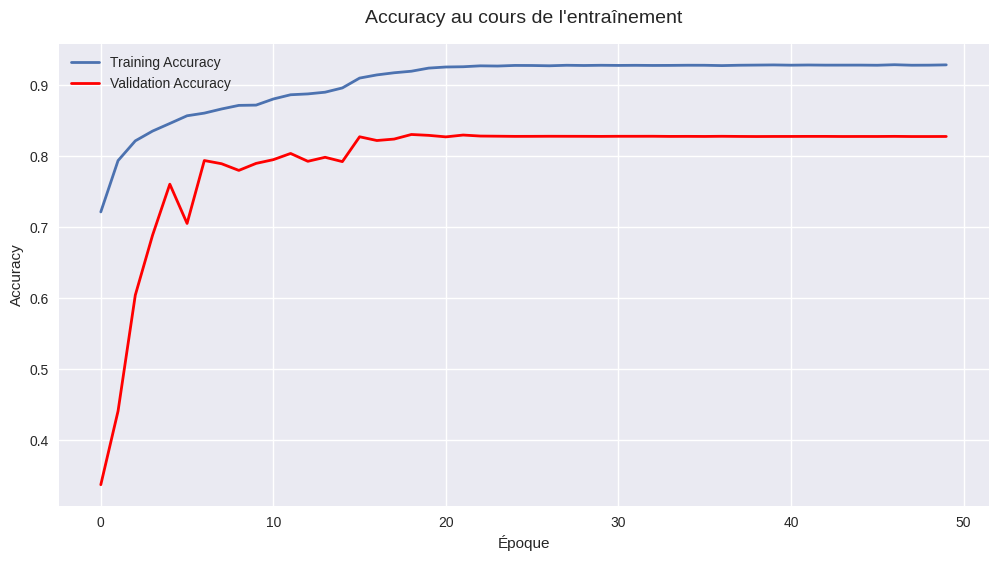

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style for better visuals
sns.set_style("whitegrid")
plt.style.use("seaborn")

# Read the CSV file
history_df = pd.read_csv('training_log.csv')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Training and Validation Accuracy
ax.plot(history_df['epoch'], history_df['accuracy'], label='Training Accuracy', linewidth=2)
ax.plot(history_df['epoch'], history_df['val_accuracy'], label='Validation Accuracy', linewidth=2, color='red')

# Set titles and labels
ax.set_title('Accuracy au cours de l\'entraînement', fontsize=14, pad=15)
ax.set_xlabel('Époque')
ax.set_ylabel('Accuracy')

# Add legend and grid
ax.legend(loc='best')
ax.grid(True)

# Display the plot
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


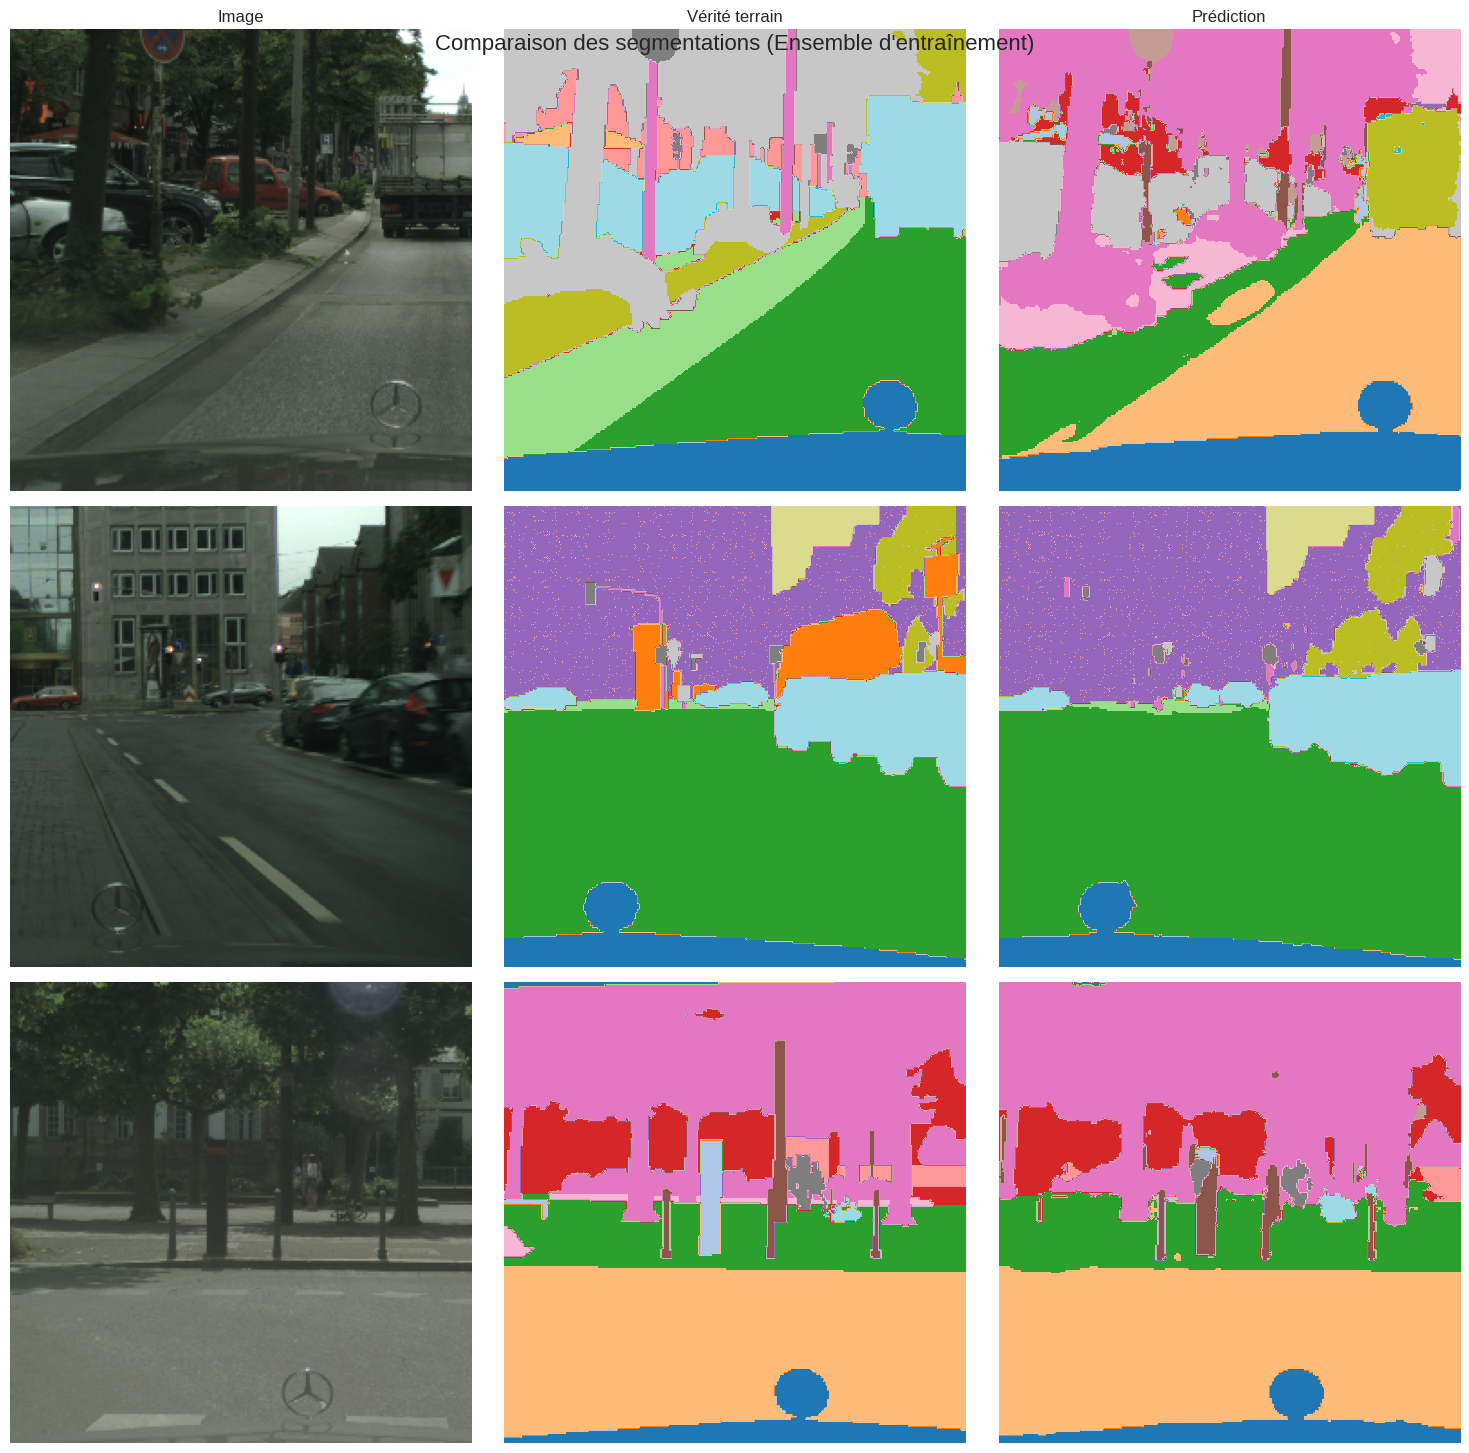

Statistiques des prédictions sur l'ensemble d'entraînement:
Valeurs uniques dans les prédictions: [21 20 17 23 11 15  4 28 31 27 19 26 24 25 32 22  5 12  8  7 13 33  6  9
  1  2  3 16 10]
Nombre de classes prédites: 29


In [16]:
num = 3

# Obtenir des prédictions pour un batch d'entraînement
for images, labels in train_ds.take(1):
   predictions = model.predict(images)
   pred_masks = tf.argmax(predictions, axis=-1)
   pred_masks = pred_masks[..., tf.newaxis]
   
   # Créer une figure avec 3 lignes (images) et 3 colonnes (original, vérité terrain, prédiction)
   plt.figure(figsize=(15, 15))
   
   titles = ['Image', 'Vérité terrain', 'Prédiction']
   
   for i in range(num):
       # Image originale
       plt.subplot(num, 3, i*3 + 1)
       # Denormaliser l'image
       display_img = (images[i] + 1) / 2
       plt.imshow(display_img)
       plt.title(titles[0] if i == 0 else '')
       plt.axis('off')
       
       # Masque réel
       plt.subplot(num, 3, i*3 + 2)
       plt.imshow(tf.squeeze(labels[i]), cmap='tab20')
       plt.title(titles[1] if i == 0 else '')
       plt.axis('off')
       
       # Masque prédit
       plt.subplot(num, 3, i*3 + 3)
       plt.imshow(tf.squeeze(pred_masks[i]), cmap='tab20')
       plt.title(titles[2] if i == 0 else '')
       plt.axis('off')
   
   plt.suptitle('Comparaison des segmentations (Ensemble d\'entraînement)', fontsize=16, y=0.95)
   plt.tight_layout()
   plt.show()

# Afficher quelques statistiques
print("Statistiques des prédictions sur l'ensemble d'entraînement:")
print(f"Valeurs uniques dans les prédictions: {tf.unique(tf.reshape(pred_masks, [-1]))[0].numpy()}")
print(f"Nombre de classes prédites: {len(tf.unique(tf.reshape(pred_masks, [-1]))[0])}")

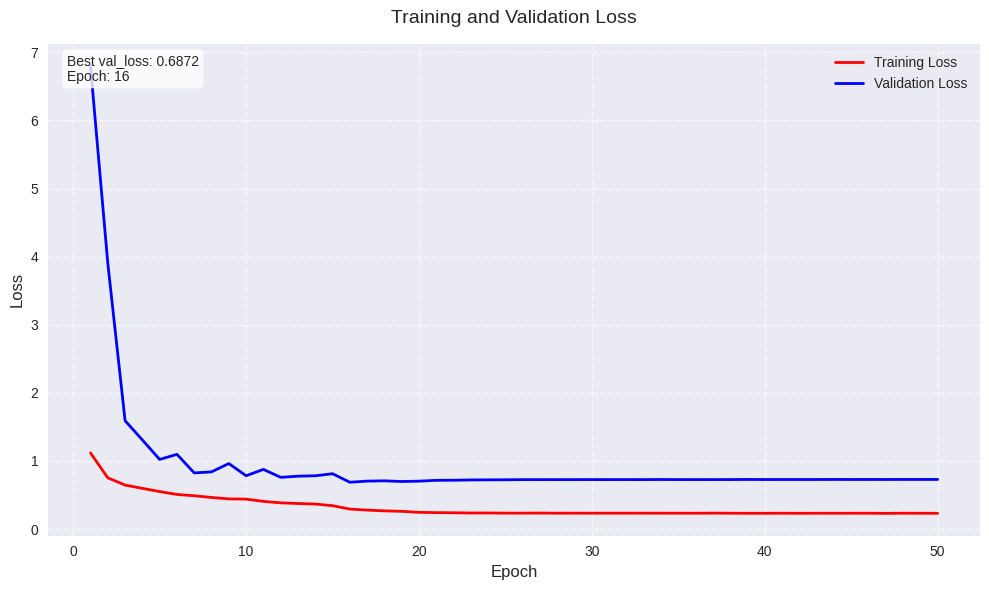


Meilleure loss de validation: 0.6872 (epoch 16)


In [17]:
import matplotlib.pyplot as plt

def plot_loss(history):
    # Récupérer les données de loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    # Créer la figure
    plt.figure(figsize=(10, 6))
    
    # Tracer les courbes
    plt.plot(epochs, loss, 'r-', label='Training Loss', linewidth=2)
    plt.plot(epochs, val_loss, 'b-', label='Validation Loss', linewidth=2)
    
    # Configurer le graphique
    plt.title('Training and Validation Loss', fontsize=14, pad=15)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    
    # Ajouter la meilleure valeur de validation
    best_val_loss = min(val_loss)
    best_epoch = val_loss.index(min(val_loss)) + 1
    plt.text(0.02, 0.98, f'Best val_loss: {best_val_loss:.4f}\nEpoch: {best_epoch}',
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Ajuster les marges
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()
    
    # Afficher les valeurs numériques
    print(f"\nMeilleure loss de validation: {best_val_loss:.4f} (epoch {best_epoch})")
plot_loss(history)